In [17]:
#http://archive.ics.uci.edu/ml/datasets/Covertype 

Problem Statement

This is a classification problem where we are going to use above CoverType Dataset.
Covertype Data Set is a dataset describing cartographic features of areas of land in the USA and also its forest type according to the US Forest Service.
The above dataset has 7 (1 to 7) classes but we are interested in only class 3.
So our classification model should be binary that should classify whether the the new data input is class 3 or not.

In this test we use the Covertype Data Set, a dataset describing cartographic features of areas of land in the USA and also its forest type according to the US Forest Service. There are seven classes(COVER_TYPE) (1-7), 581012 samples and 54 features. For this test, we're only interested in cover type 3.
Note - COVER_TYPE is the last column

1. Build the model and evaluate the accuracy

In [53]:
import pandas as pd
data = pd.read_csv('covtype.data', header=None)

In [66]:
y = data[54].apply(lambda x : 1 if x==3 else 0)
y.value_counts()

import numpy as np 
#y = np.where(data[54]==3, 1, 0)
print(y.shape)
x = data.drop(54, axis=1)
print(x.shape)
print(data.shape)

(581012,)
(581012, 54)
(581012, 55)


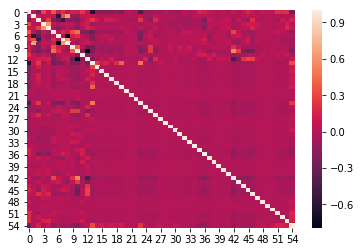

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.heatmap(data.corr())
plt.show()


In [58]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, stratify=y)

In [59]:
print(x_train.shape, x_test.shape) 

(435759, 54) (145253, 54)


In [27]:
data[54].value_counts()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: 54, dtype: int64

In [25]:
from sklearn.linear_model import LogisticRegression 
model = LogisticRegression()
model.fit(x_train, y_train)

/Users/yang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
model.score(x_train, y_train)

0.962541221179597

----

2. Is accuracy is the correct measure of model performance here
3. How would you select few important features out of given 54 features


answer:

    accuracy is not the best metric as "type 3" is only small percent in the training data, therefore, switch the metrix to f1_score

    instead PCA, feature_selection, such as selectKBest or SelectPercentile, should be used as the requirement is to use few important features, not to generate few combinated feature. 
    

In [28]:
from sklearn.metrics import f1_score
print(f1_score(model.predict(x_train), y_train))
print(f1_score(model.predict(x_test), y_test))

0.6860538918700594
0.6852054007469118


In [67]:
from sklearn.ensemble import GradientBoostingClassifier
model2 = GradientBoostingClassifier()
model2.fit(x_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [69]:
from sklearn.metrics import f1_score
print(model2.score(x_train, y_train))
print(f1_score(model2.predict(x_train), y_train))
print(f1_score(model2.predict(x_test), y_test))

0.9733545377146542
0.7845785636097145
0.7796496708691287


In [71]:
from sklearn.neural_network import MLPClassifier
model3 = MLPClassifier(hidden_layer_sizes=(32, 16), random_state=1)
model3.fit(x_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(32, 16), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [72]:
print(model3.score(x_train, y_train))
print(f1_score(model3.predict(x_train), y_train))
print(f1_score(model3.predict(x_test), y_test))

0.9783091112289132
0.8209848484848484
0.8228296923252888


In [31]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5, svd_solver='auto')
x_pca = pca.fit(x_train)
x_pca.components_

array([[ 5.91293019e-02, -1.60188918e-03, -1.08954635e-03,
         1.02696267e-02, -2.17749868e-03,  8.49503437e-01,
         1.29355184e-03,  2.02013707e-03,  1.44612183e-03,
         5.24142910e-01,  1.50621010e-04, -1.86235398e-05,
        -8.64640085e-05, -4.55334614e-05, -4.16822345e-06,
        -6.99037435e-06, -5.38267208e-06, -8.60758927e-06,
        -2.17630972e-06, -7.70530932e-06,  2.04404609e-07,
         3.64972420e-07, -1.37152945e-06, -2.98943543e-05,
        -8.28140435e-06,  1.92555611e-05, -8.20437608e-06,
        -7.64397536e-07, -4.27242186e-09,  1.74571633e-06,
        -2.25754654e-06,  9.98998936e-08,  2.68044524e-06,
         6.41965634e-06, -4.81313092e-07,  4.07187741e-06,
        -2.57593170e-06, -2.41634173e-06, -2.16178031e-07,
         4.19879217e-07,  4.99380799e-08, -7.92869241e-07,
         7.76589156e-05,  1.09101607e-05, -8.79742978e-06,
        -1.77854562e-05, -1.40588495e-05, -2.76439368e-07,
        -6.94014098e-08,  1.56801327e-08,  2.03662402e-0

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
#kb = SelectKBest(chi2, k=27).fit(x_train, y_train)
#chi2 requires non-negative value ??

In [36]:
from sklearn.feature_selection import RFECV
import warnings
warnings.filterwarnings('ignore')

estimator = LogisticRegression()
selector = RFECV(estimator, step=0.2, cv=5, min_features_to_select=27)
selector = selector.fit(x_train, y_train)
print(selector.support_)
print(selector.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [43]:
from sklearn.feature_selection import SelectKBest, f_classif
kb = SelectKBest(f_classif, k=27).fit(x_train, y_train)
kb.get_support()

array([ True, False,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True, False, False, False,  True, False,  True, False,
       False, False, False, False, False, False, False, False,  True,
        True,  True, False, False, False, False,  True,  True,  True,
        True,  True, False, False, False, False, False, False, False])

In [50]:
new_x_train = kb.transform(x_train)
new_x_test = kb.transform(x_test)

model = LogisticRegression()
model.fit(new_x_train, y_train)
print(model.score(new_x_train, y_train))
print(f1_score(model.predict(new_x_train), y_train))
print(f1_score(model.predict(new_x_test), y_test))

0.956730669934528
0.6112611591035605
0.6140275121830856


In [51]:
from sklearn.feature_selection import SelectPercentile, f_regression
perc = SelectPercentile(f_regression, percentile=50).fit(x_train, y_train)
perc.get_support()

array([ True, False,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True, False, False, False,  True, False,  True, False,
       False, False, False, False, False, False, False, False,  True,
        True,  True, False, False, False, False,  True,  True,  True,
        True,  True, False, False, False, False, False, False, False])

In [52]:
new_x_train = perc.transform(x_train)
new_x_test = perc.transform(x_test)

model = LogisticRegression()
model.fit(new_x_train, y_train)
print(model.score(new_x_train, y_train))
print(f1_score(model.predict(new_x_train), y_train))
print(f1_score(model.predict(new_x_test), y_test))

0.956730669934528
0.6112611591035605
0.6140275121830856
